In [ ]:
import os
VENV_PYTHON = os.path.abspath("../.venv/bin/python")
print(VENV_PYTHON)

# FedAvg

In [48]:
import os
import subprocess
import time
import shutil

folder = "results_fedavg"


def run_experiment(alpha_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in alpha_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} alpha ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", str(a),
            "--strategy", "fedavg"
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
                "--strategy", "fedavg"
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} alpha ===\n")

alpha_list = [0.1,1,10]
run_experiment(alpha_list)

Deleted existing folder: results_fedavg

=== Running test for 0.1 alpha ===
Started server (PID 91662)
Started client 0 (PID 91680)
Started client 1 (PID 91681)
Started client 2 (PID 91682)
Started client 3 (PID 91690)
Started client 4 (PID 91701)
Started client 5 (PID 91713)
Started client 6 (PID 91730)
Started client 7 (PID 91742)
Started client 8 (PID 91754)
Started client 9 (PID 91766)
=== Finished test for 0.1 alpha ===


=== Running test for 1 alpha ===
Started server (PID 94206)
Started client 0 (PID 94229)
Started client 1 (PID 94250)
Started client 2 (PID 94251)
Started client 3 (PID 94269)
Started client 4 (PID 94281)
Started client 5 (PID 94293)
Started client 6 (PID 94294)
Started client 7 (PID 94306)
Started client 8 (PID 94318)
Started client 9 (PID 94330)
=== Finished test for 1 alpha ===


=== Running test for 10 alpha ===
Started server (PID 96627)
Started client 0 (PID 96650)
Started client 1 (PID 96677)
Started client 2 (PID 96678)
Started client 3 (PID 96690)
Starte

In [49]:
! python vizualizer.py --folder results_fedavg --param_index 5 --print_table

+--------+-------+--------+-------+------+-------+----------+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha | strategy |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+----------+--------------------+---------------------+
|   50   |   3   |   10   |   64  | 0.01 |  0.1  |  fedavg  | 0.7851549483505498 |  0.574692518639936  |
|   50   |   3   |   10   |   64  | 0.01 |  1.0  |  fedavg  | 0.8733860891295293 | 0.34783009097557277 |
|   50   |   3   |   10   |   64  | 0.01 |  10.0 |  fedavg  | 0.8739691795085381 | 0.34455077899391084 |
+--------+-------+--------+-------+------+-------+----------+--------------------+---------------------+
Saved metric curve plots to results_fedavg/plot1.png
Saved final accuracy vs param plot to results_fedavg/plot2.png


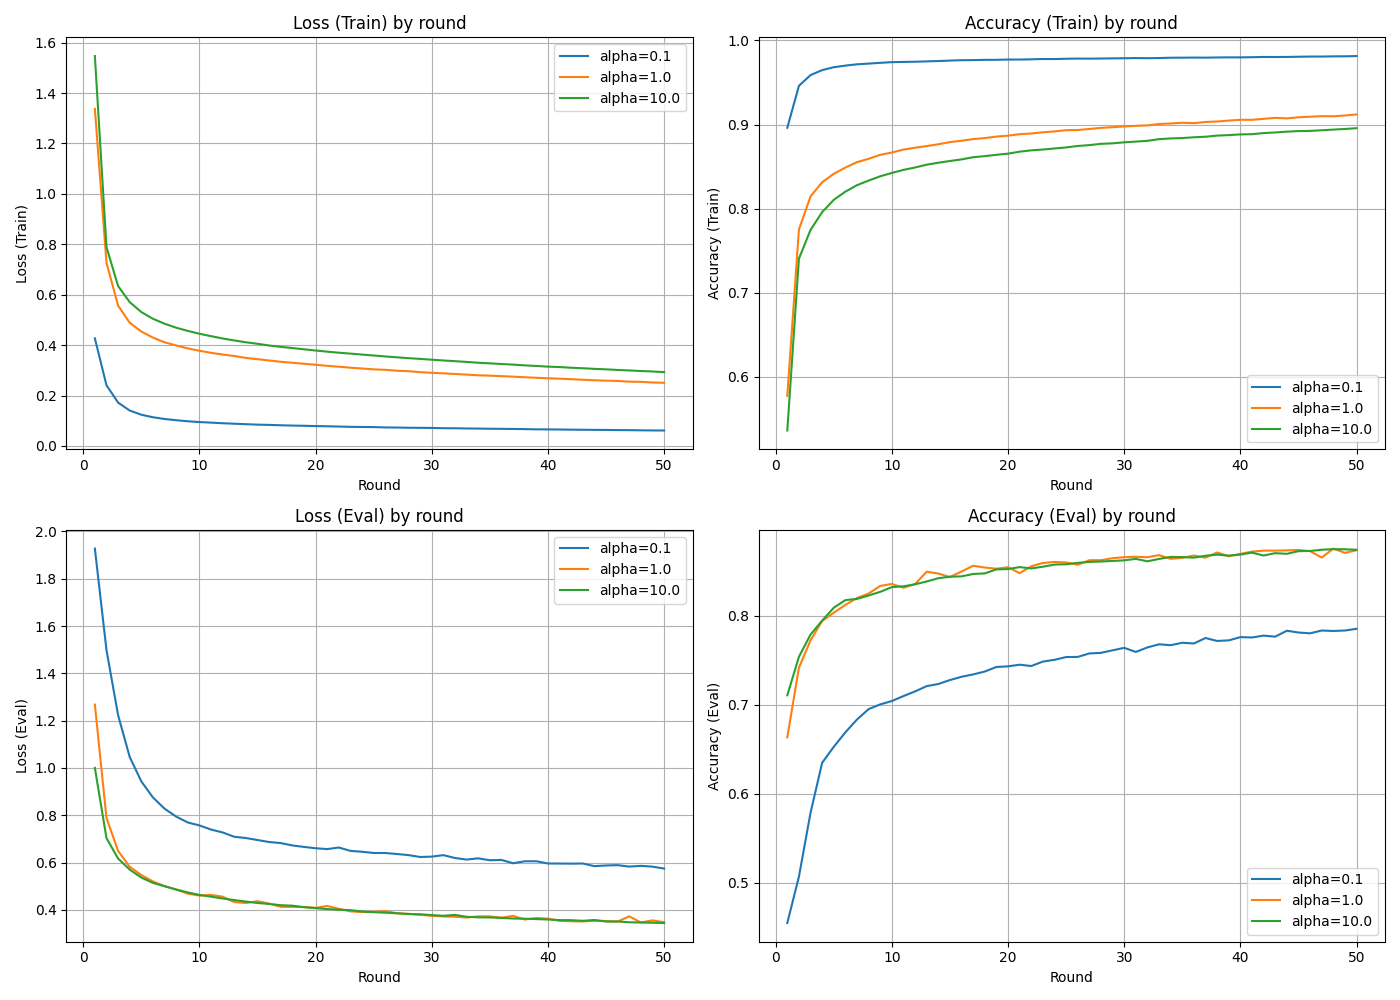

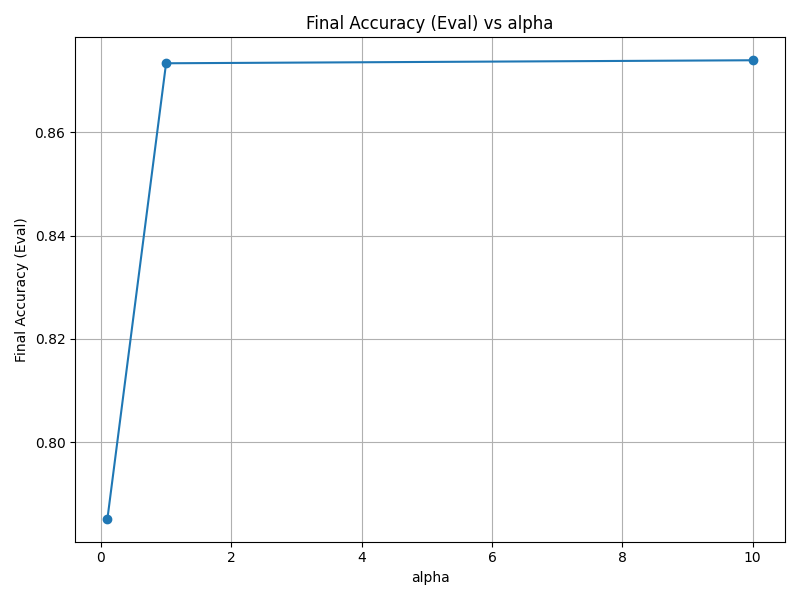

In [50]:
from IPython.display import Image, display

plot1_path = 'results_fedavg/plot1.png'
plot2_path = 'results_fedavg/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# FedProx

## Mu test for alpha = 0.1

In [ ]:
import os
import subprocess
import time
import shutil

folder = "results_alpha_low"


def run_experiment(mu_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for mu in mu_list:
        log_folder = os.path.join(folder, f"logs_mu{mu}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {mu} mu ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "0.1",
            "--strategy", "fedprox",
            "--mu",str(mu)
        ]
        server_log_path = os.path.join(log_folder, f"server_{mu}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
                "--strategy", "fedprox"
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_mu{mu}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {mu} mu ===\n")

mu_list = [0, 0.0001, 0.001, 0.01, 0.1, 1]
run_experiment(mu_list)

In [40]:
! python vizualizer.py --folder results_alpha_low --param_index 7 --print_table

+--------+-------+--------+-------+------+-------+----------+--------+--------------------+--------------------+
| rounds | epoch | client | batch |  lr  | alpha | strategy |   mu   |      accuracy      |        loss        |
+--------+-------+--------+-------+------+-------+----------+--------+--------------------+--------------------+
|   50   |   3   |   10   |   64  | 0.01 |  0.1  | fedprox  |  0.0   | 0.7876541152949017 | 0.5589295441569665 |
|   50   |   3   |   10   |   64  | 0.01 |  0.1  | fedprox  | 0.0001 | 0.7785738087304231 | 0.597383185480037  |
|   50   |   3   |   10   |   64  | 0.01 |  0.1  | fedprox  | 0.001  | 0.7822392535821393 | 0.5800508754225482 |
|   50   |   3   |   10   |   64  | 0.01 |  0.1  | fedprox  |  0.01  | 0.7789070309896701 | 0.5861798769166592 |
|   50   |   3   |   10   |   64  | 0.01 |  0.1  | fedprox  |  0.1   | 0.7728257247584138 | 0.5930137942169297 |
|   50   |   3   |   10   |   64  | 0.01 |  0.1  | fedprox  |  1.0   | 0.7375874708430523 | 0.67

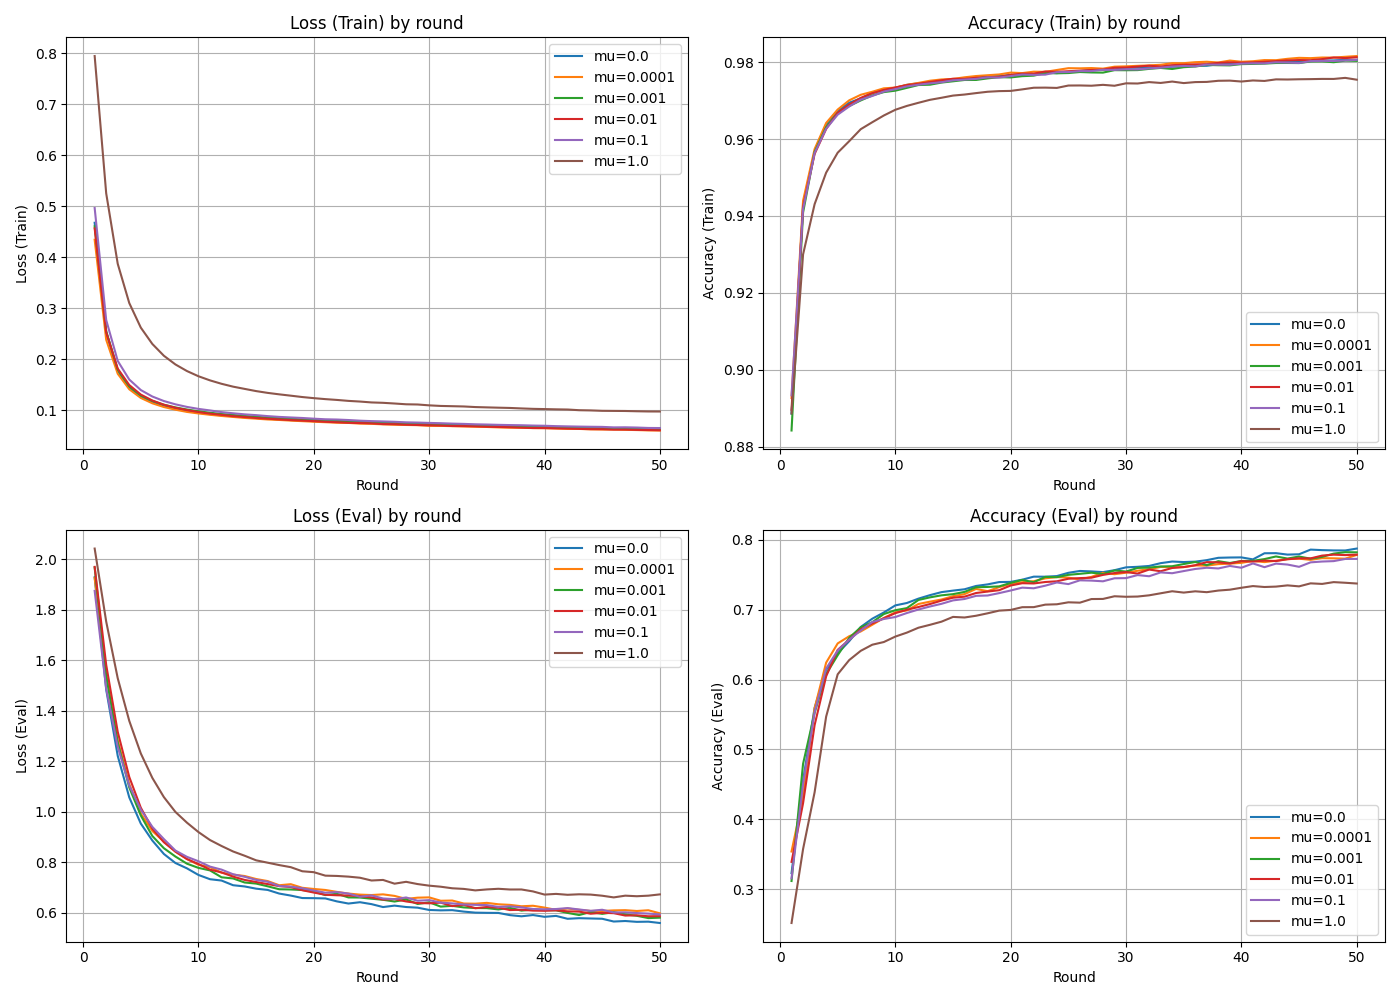

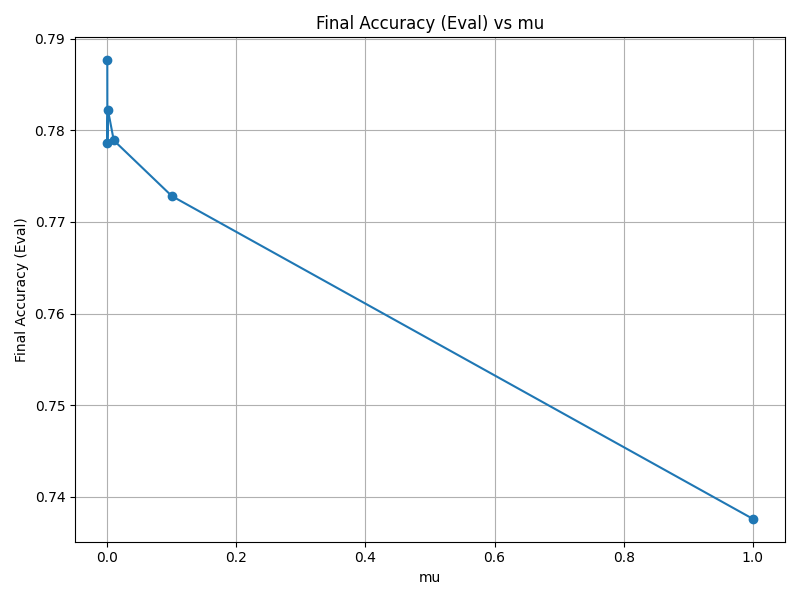

In [41]:
from IPython.display import Image, display

plot1_path = 'results_alpha_low/plot1.png'
plot2_path = 'results_alpha_low/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

## Mu test for alpha = 1

In [46]:
import os
import subprocess
import time
import shutil

folder = "results_alpha_medium"


def run_experiment(mu_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for mu in mu_list:
        log_folder = os.path.join(folder, f"logs_mu{mu}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {mu} mu ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "1",
            "--strategy", "fedprox",
            "--mu",str(mu)
        ]
        server_log_path = os.path.join(log_folder, f"server_{mu}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
                "--strategy", "fedprox"
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_mu{mu}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {mu} mu ===\n")

mu_list = [0, 0.0001, 0.001, 0.01, 0.1, 1]
run_experiment(mu_list)

Deleted existing folder: results_alpha_medium

=== Running test for 0 mu ===
Started server (PID 163819)
Started client 0 (PID 163848)
Started client 1 (PID 163849)
Started client 2 (PID 163850)
Started client 3 (PID 163851)
Started client 4 (PID 163863)
Started client 5 (PID 163895)
Started client 6 (PID 163910)
Started client 7 (PID 163925)
Started client 8 (PID 163937)
Started client 9 (PID 163938)
=== Finished test for 0 mu ===


=== Running test for 0.0001 mu ===
Started server (PID 166739)
Started client 0 (PID 166762)
Started client 1 (PID 166763)
Started client 2 (PID 166764)
Started client 3 (PID 166769)
Started client 4 (PID 166783)
Started client 5 (PID 166795)
Started client 6 (PID 166816)
Started client 7 (PID 166839)
Started client 8 (PID 166851)
Started client 9 (PID 166852)
=== Finished test for 0.0001 mu ===


=== Running test for 0.001 mu ===
Started server (PID 169624)
Started client 0 (PID 169647)
Started client 1 (PID 169648)
Started client 2 (PID 169649)
Started c

In [47]:
! python vizualizer.py --folder results_alpha_medium --param_index 7 --print_table

+--------+-------+--------+-------+------+-------+----------+--------+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha | strategy |   mu   |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+----------+--------+--------------------+---------------------+
|   50   |   3   |   10   |   64  | 0.01 |  1.0  | fedprox  |  0.0   | 0.8702207413577676 |  0.3564707899729146 |
|   50   |   3   |   10   |   64  | 0.01 |  1.0  | fedprox  | 0.0001 | 0.8640566430653894 |  0.3716507593947915 |
|   50   |   3   |   10   |   64  | 0.01 |  1.0  | fedprox  | 0.001  | 0.8698042482299042 |  0.3572195307456767 |
|   50   |   3   |   10   |   64  | 0.01 |  1.0  | fedprox  |  0.01  | 0.8742190753852561 | 0.35247519434317603 |
|   50   |   3   |   10   |   64  | 0.01 |  1.0  | fedprox  |  0.1   | 0.8688879633486047 |   0.35564533442023  |
|   50   |   3   |   10   |   64  | 0.01 |  1.0  | fedprox  |  1.0   | 0.852061640982923

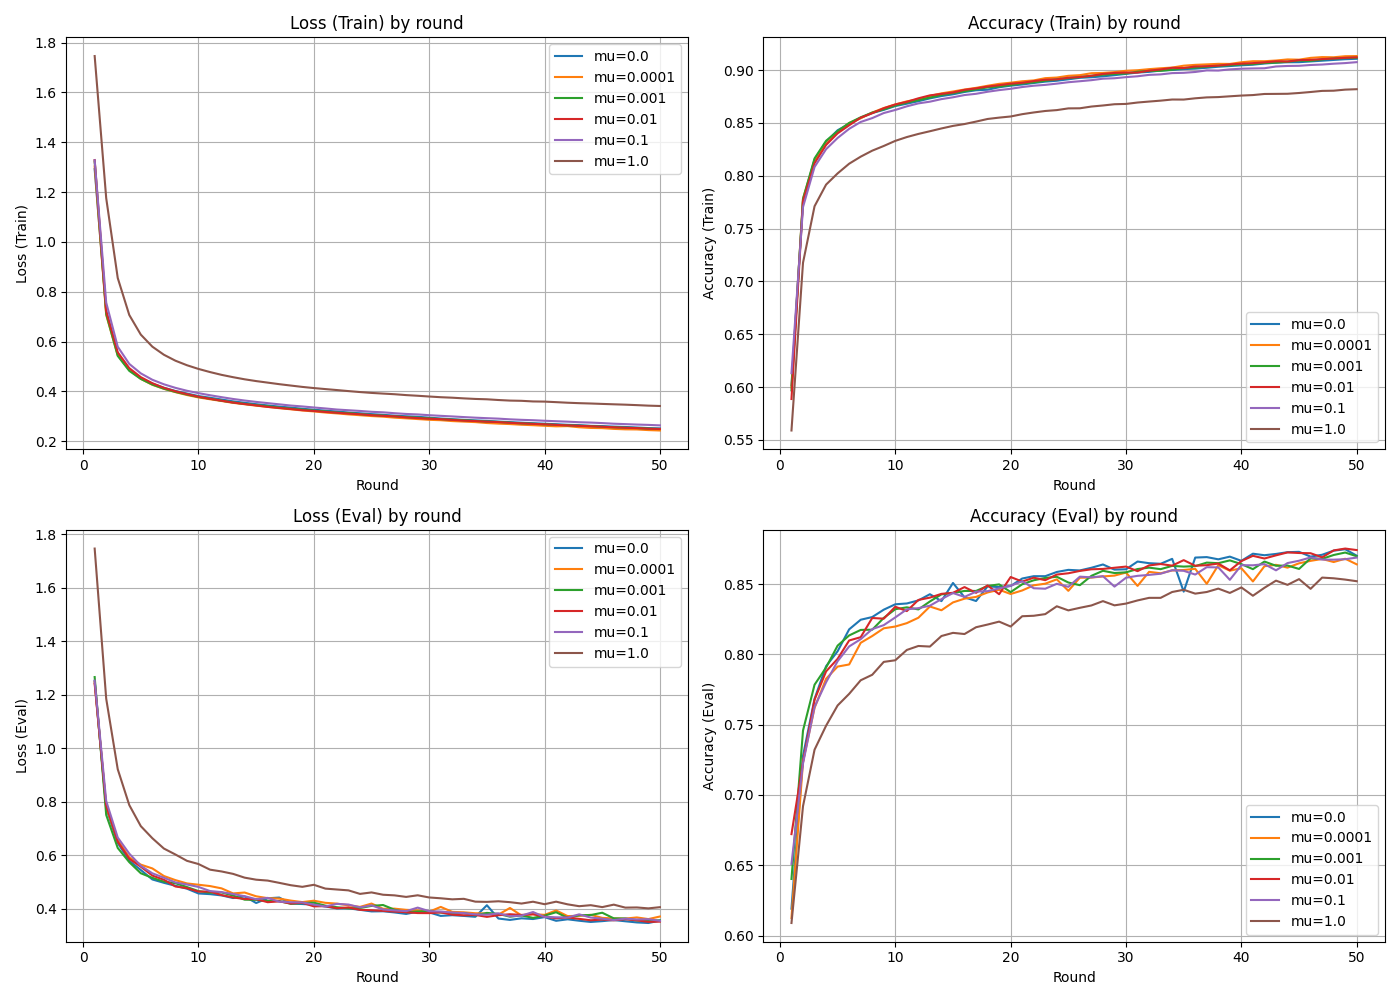

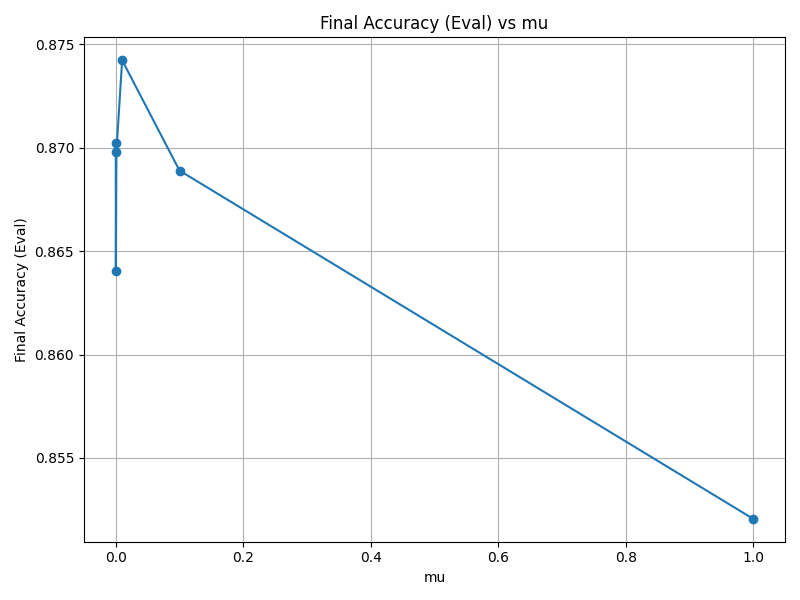

In [48]:
from IPython.display import Image, display

plot1_path = 'results_alpha_medium/plot1.png'
plot2_path = 'results_alpha_medium/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

## Mu test for alpha = 10

In [49]:
import os
import subprocess
import time
import shutil

folder = "results_alpha_high"


def run_experiment(mu_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for mu in mu_list:
        log_folder = os.path.join(folder, f"logs_mu{mu}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {mu} mu ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "10",
            "--strategy", "fedprox",
            "--mu",str(mu)
        ]
        server_log_path = os.path.join(log_folder, f"server_{mu}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
                "--strategy", "fedprox"
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_mu{mu}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {mu} mu ===\n")

mu_list = [0, 0.0001, 0.001, 0.01, 0.1, 1]
run_experiment(mu_list)


=== Running test for 0 mu ===
Started server (PID 181424)


Started client 0 (PID 181447)
Started client 1 (PID 181448)
Started client 2 (PID 181469)
Started client 3 (PID 181484)
Started client 4 (PID 181499)
Started client 5 (PID 181500)
Started client 6 (PID 181512)
Started client 7 (PID 181524)
Started client 8 (PID 181536)
Started client 9 (PID 181548)
=== Finished test for 0 mu ===


=== Running test for 0.0001 mu ===
Started server (PID 184274)
Started client 0 (PID 184317)
Started client 1 (PID 184318)
Started client 2 (PID 184319)
Started client 3 (PID 184331)
Started client 4 (PID 184343)
Started client 5 (PID 184350)
Started client 6 (PID 184362)
Started client 7 (PID 184374)
Started client 8 (PID 184386)
Started client 9 (PID 184398)
=== Finished test for 0.0001 mu ===


=== Running test for 0.001 mu ===
Started server (PID 186789)
Started client 0 (PID 186832)
Started client 1 (PID 186839)
Started client 2 (PID 186840)
Started client 3 (PID 186852)
Started client 4 (PID 186864)
Started client 5 (PID 186876)
Started client 6 (PID 18

In [50]:
! python vizualizer.py --folder results_alpha_high --param_index 7 --print_table

+--------+-------+--------+-------+------+-------+----------+--------+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha | strategy |   mu   |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+----------+--------+--------------------+---------------------+
|   50   |   3   |   10   |   64  | 0.01 |  10.0 | fedprox  |  0.0   | 0.8807996668054977 |  0.3382308394126423 |
|   50   |   3   |   10   |   64  | 0.01 |  10.0 | fedprox  | 0.0001 | 0.882548937942524  |  0.3235563037098571 |
|   50   |   3   |   10   |   64  | 0.01 |  10.0 | fedprox  | 0.001  | 0.8753852561432737 | 0.34613830002086055 |
|   50   |   3   |   10   |   64  | 0.01 |  10.0 | fedprox  |  0.01  | 0.8815493544356519 |  0.3329925733126982 |
|   50   |   3   |   10   |   64  | 0.01 |  10.0 | fedprox  |  0.1   | 0.8750520616409829 |  0.3532408556085187 |
|   50   |   3   |   10   |   64  | 0.01 |  10.0 | fedprox  |  1.0   | 0.858142440649729

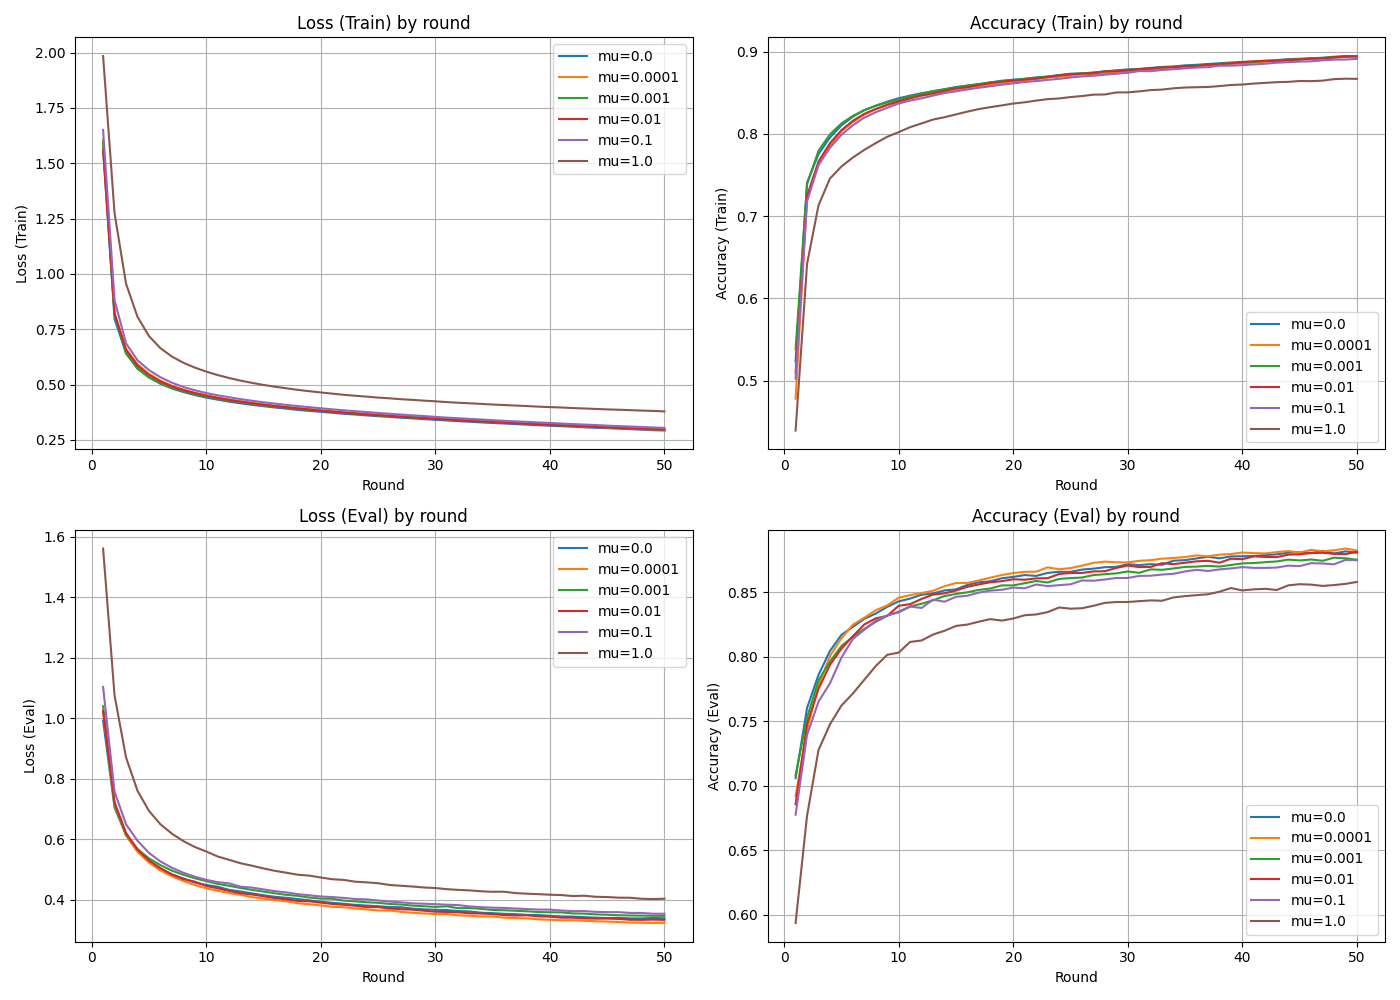

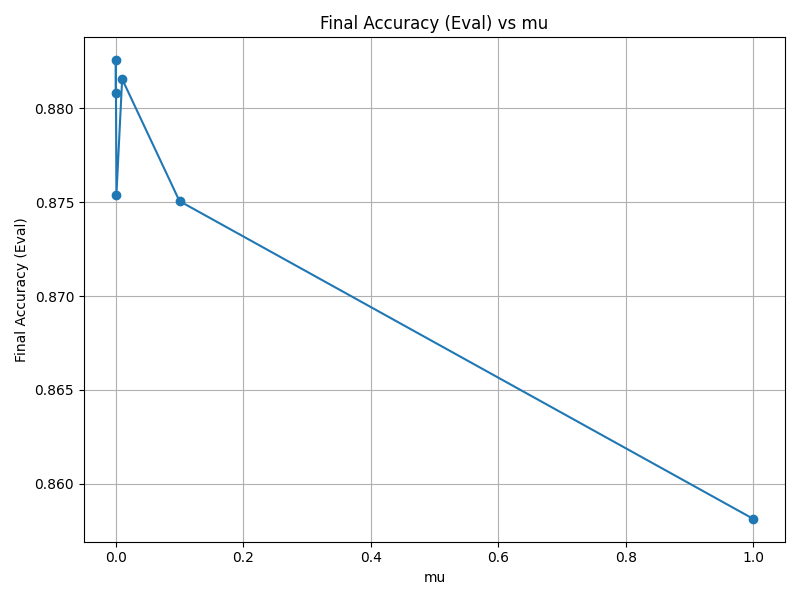

In [51]:
from IPython.display import Image, display

plot1_path = 'results_alpha_high/plot1.png'
plot2_path = 'results_alpha_high/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

## Normal tests

In [9]:
import os
import subprocess
import time
import shutil

folder = "results_fedprox"


def run_experiment(alpha_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in alpha_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} alpha ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", str(a),
            "--strategy", "fedprox",
            "--mu","0.1"
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
                "--strategy", "fedprox"
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} alpha ===\n")

alpha_list = [0.1,1,10]
run_experiment(alpha_list)

Deleted existing folder: results_fedprox

=== Running test for 0.1 alpha ===
Started server (PID 25745)
Started client 0 (PID 25768)
Started client 1 (PID 25769)
Started client 2 (PID 25770)
Started client 3 (PID 25802)
Started client 4 (PID 25803)
Started client 5 (PID 25819)
Started client 6 (PID 25833)
Started client 7 (PID 25845)
Started client 8 (PID 25857)
Started client 9 (PID 25869)
=== Finished test for 0.1 alpha ===


=== Running test for 1 alpha ===
Started server (PID 28652)
Started client 0 (PID 28675)
Started client 1 (PID 28699)
Started client 2 (PID 28703)
Started client 3 (PID 28715)
Started client 4 (PID 28727)
Started client 5 (PID 28728)
Started client 6 (PID 28740)
Started client 7 (PID 28752)
Started client 8 (PID 28764)
Started client 9 (PID 28765)
=== Finished test for 1 alpha ===


=== Running test for 10 alpha ===
Started server (PID 31384)
Started client 0 (PID 31413)
Started client 1 (PID 31434)
Started client 2 (PID 31435)
Started client 3 (PID 31447)
Start

In [10]:
! python vizualizer.py --folder results_fedprox --param_index 5 --print_table

+--------+-------+--------+-------+------+-------+----------+-----+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha | strategy |  mu |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+----------+-----+--------------------+---------------------+
|   50   |   3   |   10   |   64  | 0.01 |  0.1  | fedprox  | 0.1 | 0.7729923358880373 |  0.5963089995220259 |
|   50   |   3   |   10   |   64  | 0.01 |  1.0  | fedprox  | 0.1 | 0.8712203248646397 | 0.36345692414236486 |
|   50   |   3   |   10   |   64  | 0.01 |  10.0 | fedprox  | 0.1 | 0.8738025822573927 |  0.3549713165623007 |
+--------+-------+--------+-------+------+-------+----------+-----+--------------------+---------------------+
Saved metric curve plots to results_fedprox/plot1.png
Saved final accuracy vs param plot to results_fedprox/plot2.png


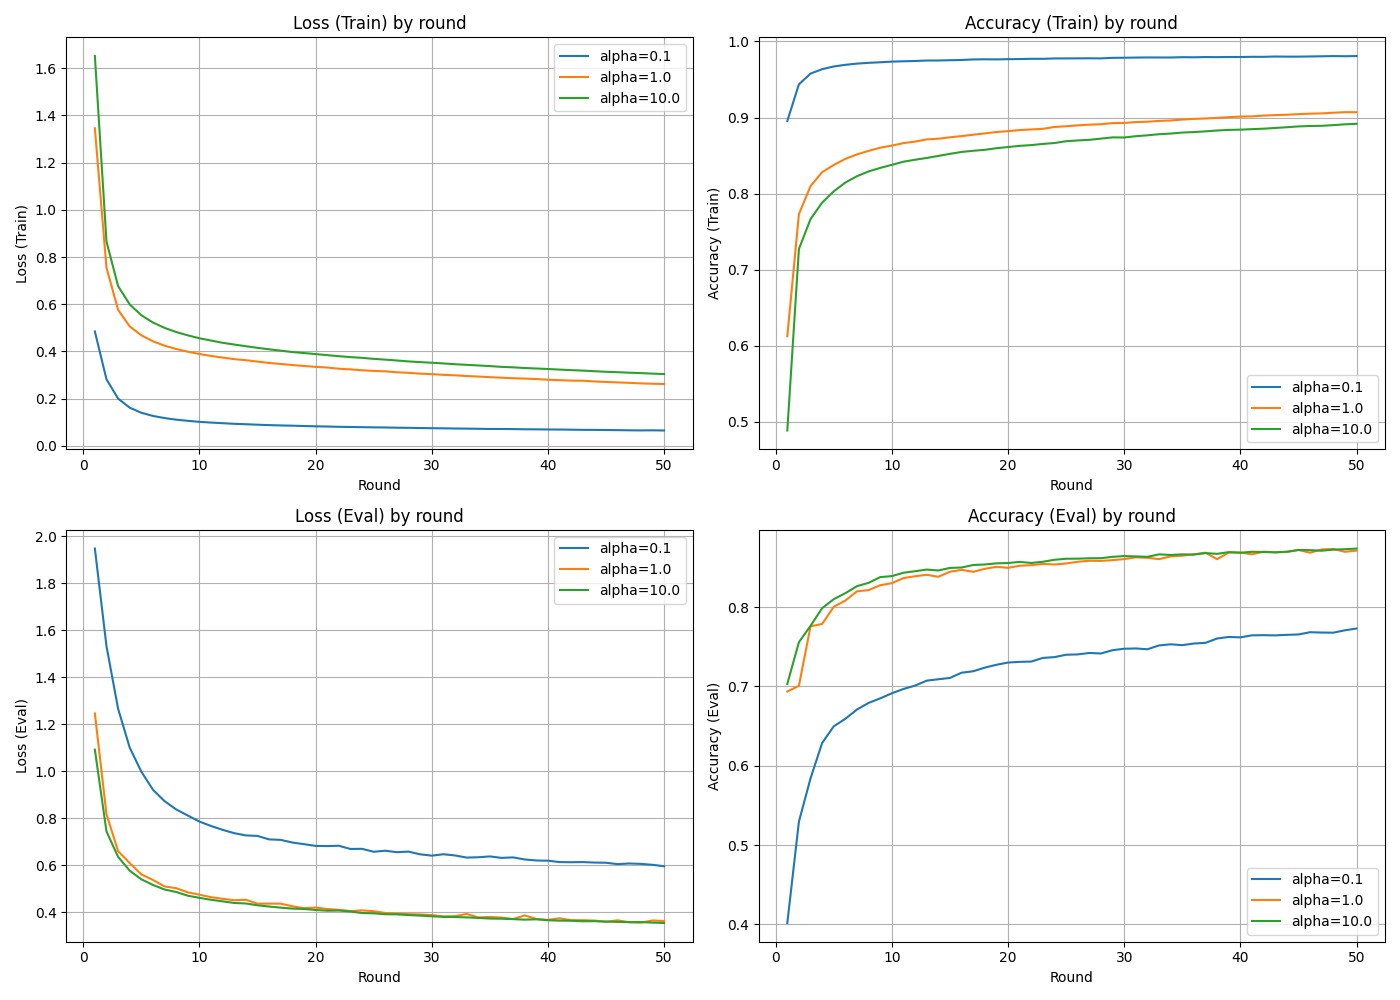

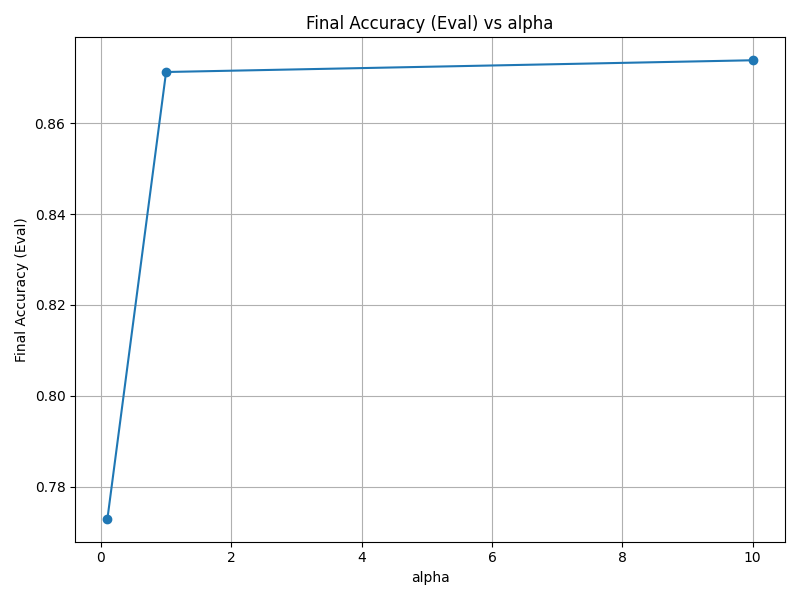

In [11]:
from IPython.display import Image, display

plot1_path = 'results_fedprox/plot1.png'
plot2_path = 'results_fedprox/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# SCAFFOLD

In [12]:
import os
import subprocess
import time
import shutil

folder = "results_scaffold"


def run_experiment(alpha_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in alpha_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} alpha ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", str(a),
            "--strategy", "scaffold"
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
                "--strategy", "scaffold"
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} alpha ===\n")

alpha_list = [0.1,1,10]
run_experiment(alpha_list)

Deleted existing folder: results_scaffold

=== Running test for 0.1 alpha ===
Started server (PID 34114)
Started client 0 (PID 34132)
Started client 1 (PID 34138)
Started client 2 (PID 34142)
Started client 3 (PID 34146)
Started client 4 (PID 34158)
Started client 5 (PID 34190)
Started client 6 (PID 34202)
Started client 7 (PID 34203)
Started client 8 (PID 34215)
Started client 9 (PID 34227)


=== Finished test for 0.1 alpha ===


=== Running test for 1 alpha ===
Started server (PID 36857)
Started client 0 (PID 36880)
Started client 1 (PID 36881)
Started client 2 (PID 36905)
Started client 3 (PID 36920)
Started client 4 (PID 36932)
Started client 5 (PID 36933)
Started client 6 (PID 36945)
Started client 7 (PID 36957)
Started client 8 (PID 36966)
Started client 9 (PID 36970)
=== Finished test for 1 alpha ===


=== Running test for 10 alpha ===
Started server (PID 39482)
Started client 0 (PID 39511)
Started client 1 (PID 39532)
Started client 2 (PID 39533)
Started client 3 (PID 39545)
Started client 4 (PID 39557)
Started client 5 (PID 39558)
Started client 6 (PID 39570)
Started client 7 (PID 39582)
Started client 8 (PID 39600)
Started client 9 (PID 39612)
=== Finished test for 10 alpha ===



In [13]:
! python vizualizer.py --folder results_scaffold --param_index 5 --print_table

+--------+-------+--------+-------+------+-------+----------+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha | strategy |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+----------+--------------------+---------------------+
|   50   |   3   |   10   |   64  | 0.01 |  0.1  | scaffold | 0.6790236587804065 |  1.3447741155103916 |
|   50   |   3   |   10   |   64  | 0.01 |  1.0  | scaffold | 0.8693044564764681 | 0.36080283325495993 |
|   50   |   3   |   10   |   64  | 0.01 |  10.0 | scaffold | 0.8783007080383174 | 0.33679702558998065 |
+--------+-------+--------+-------+------+-------+----------+--------------------+---------------------+
Saved metric curve plots to results_scaffold/plot1.png
Saved final accuracy vs param plot to results_scaffold/plot2.png


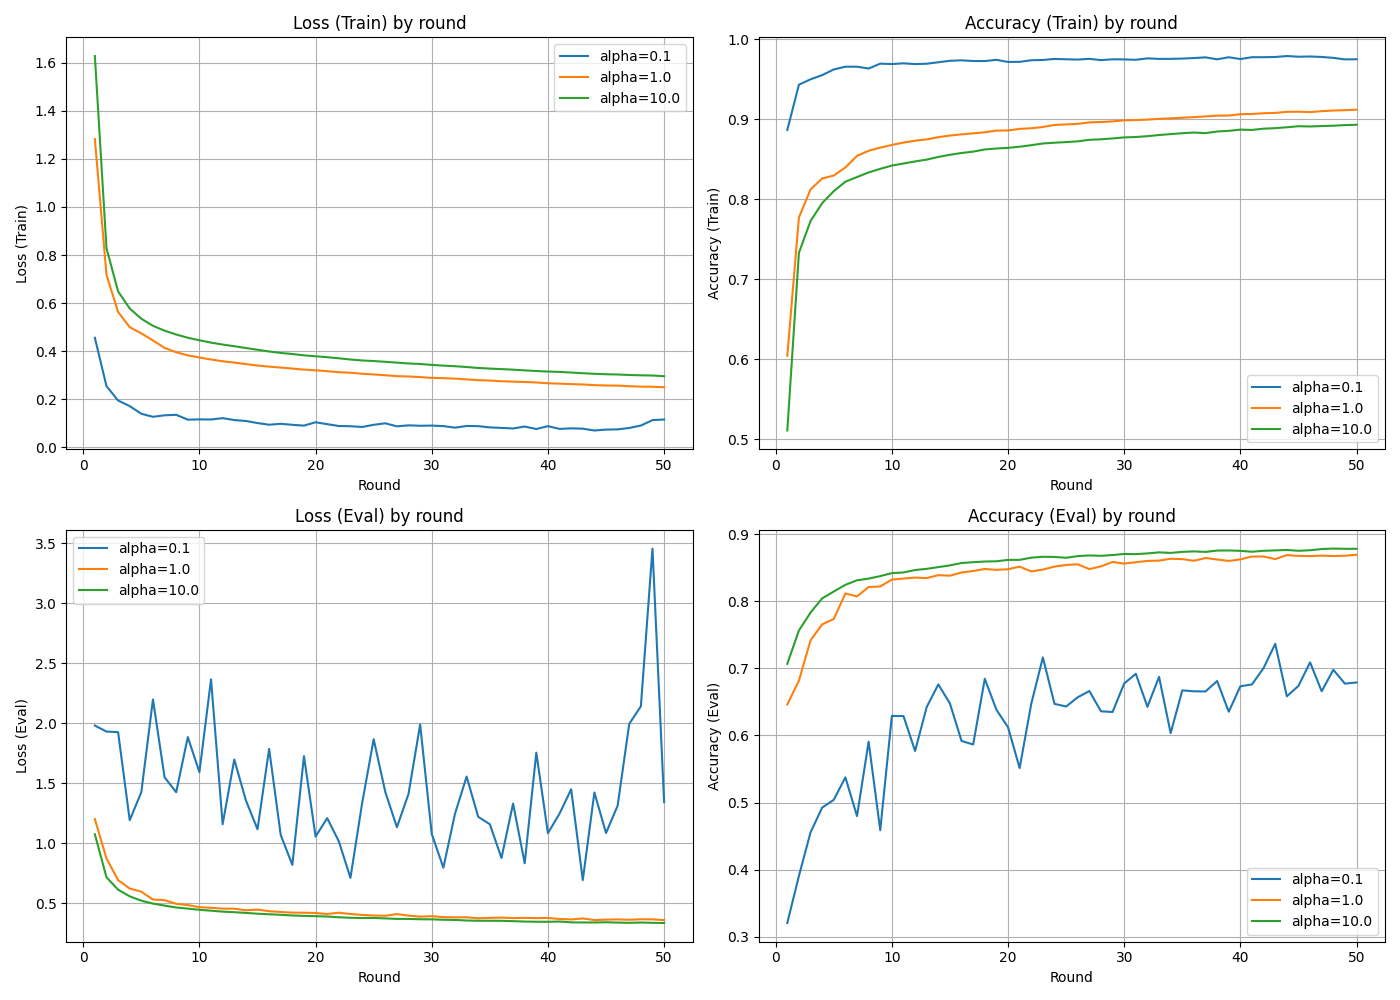

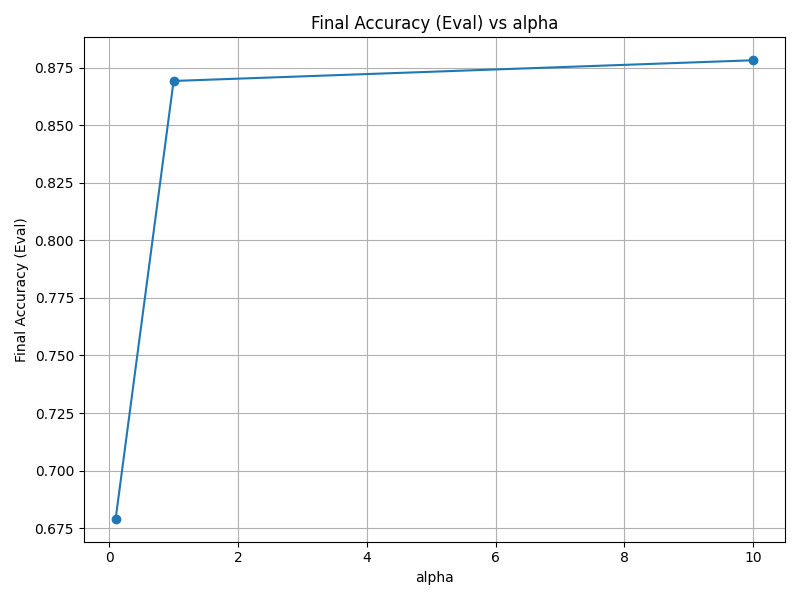

In [14]:
from IPython.display import Image, display

plot1_path = 'results_scaffold/plot1.png'
plot2_path = 'results_scaffold/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# A = 0.1 compare

In [15]:
import os
import subprocess
import time
import shutil

folder = "results_compare_low"


def run_experiment(strat_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for strat in strat_list:
        log_folder = os.path.join(folder, f"logs_{strat}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {strat} ===")
        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "0.1",
            "--strategy", strat
        ]
        server_log_path = os.path.join(log_folder, f"server_{strat}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
                "--strategy", strat
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_{strat}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {strat} ===\n")

strat_list = ["fedavg","fedprox","scaffold"]
run_experiment(strat_list)

Deleted existing folder: results_compare_low

=== Running test for fedavg ===
Started server (PID 42027)
Started client 0 (PID 42056)
Started client 1 (PID 42077)
Started client 2 (PID 42078)
Started client 3 (PID 42090)
Started client 4 (PID 42102)
Started client 5 (PID 42114)
Started client 6 (PID 42126)
Started client 7 (PID 42130)
Started client 8 (PID 42145)
Started client 9 (PID 42157)


=== Finished test for fedavg ===


=== Running test for fedprox ===
Started server (PID 44644)
Started client 0 (PID 44673)
Started client 1 (PID 44694)
Started client 2 (PID 44695)
Started client 3 (PID 44707)
Started client 4 (PID 44719)
Started client 5 (PID 44731)
Started client 6 (PID 44743)
Started client 7 (PID 44755)
Started client 8 (PID 44756)
Started client 9 (PID 44768)
=== Finished test for fedprox ===


=== Running test for scaffold ===
Started server (PID 47533)
Started client 0 (PID 47556)
Started client 1 (PID 47583)
Started client 2 (PID 47584)
Started client 3 (PID 47596)
Started client 4 (PID 47608)
Started client 5 (PID 47609)
Started client 6 (PID 47623)
Started client 7 (PID 47633)
Started client 8 (PID 47645)
Started client 9 (PID 47657)
=== Finished test for scaffold ===



In [16]:
! python vizualizer.py --folder results_compare_low --param_index 6 --print_table

+--------+-------+--------+-------+------+-------+----------+--------------------+--------------------+
| rounds | epoch | client | batch |  lr  | alpha | strategy |      accuracy      |        loss        |
+--------+-------+--------+-------+------+-------+----------+--------------------+--------------------+
|   50   |   3   |   10   |   64  | 0.01 |  0.1  |  fedavg  | 0.7784905031656114 | 0.5713810148024829 |
|   50   |   3   |   10   |   64  | 0.01 |  0.1  | fedprox  | 0.7705764745084972 | 0.6031993962762278 |
|   50   |   3   |   10   |   64  | 0.01 |  0.1  | scaffold | 0.6993502165944685 | 1.4740651587880242 |
+--------+-------+--------+-------+------+-------+----------+--------------------+--------------------+
Saved metric curve plots to results_compare_low/plot1.png
Saved final accuracy vs param plot to results_compare_low/plot2.png


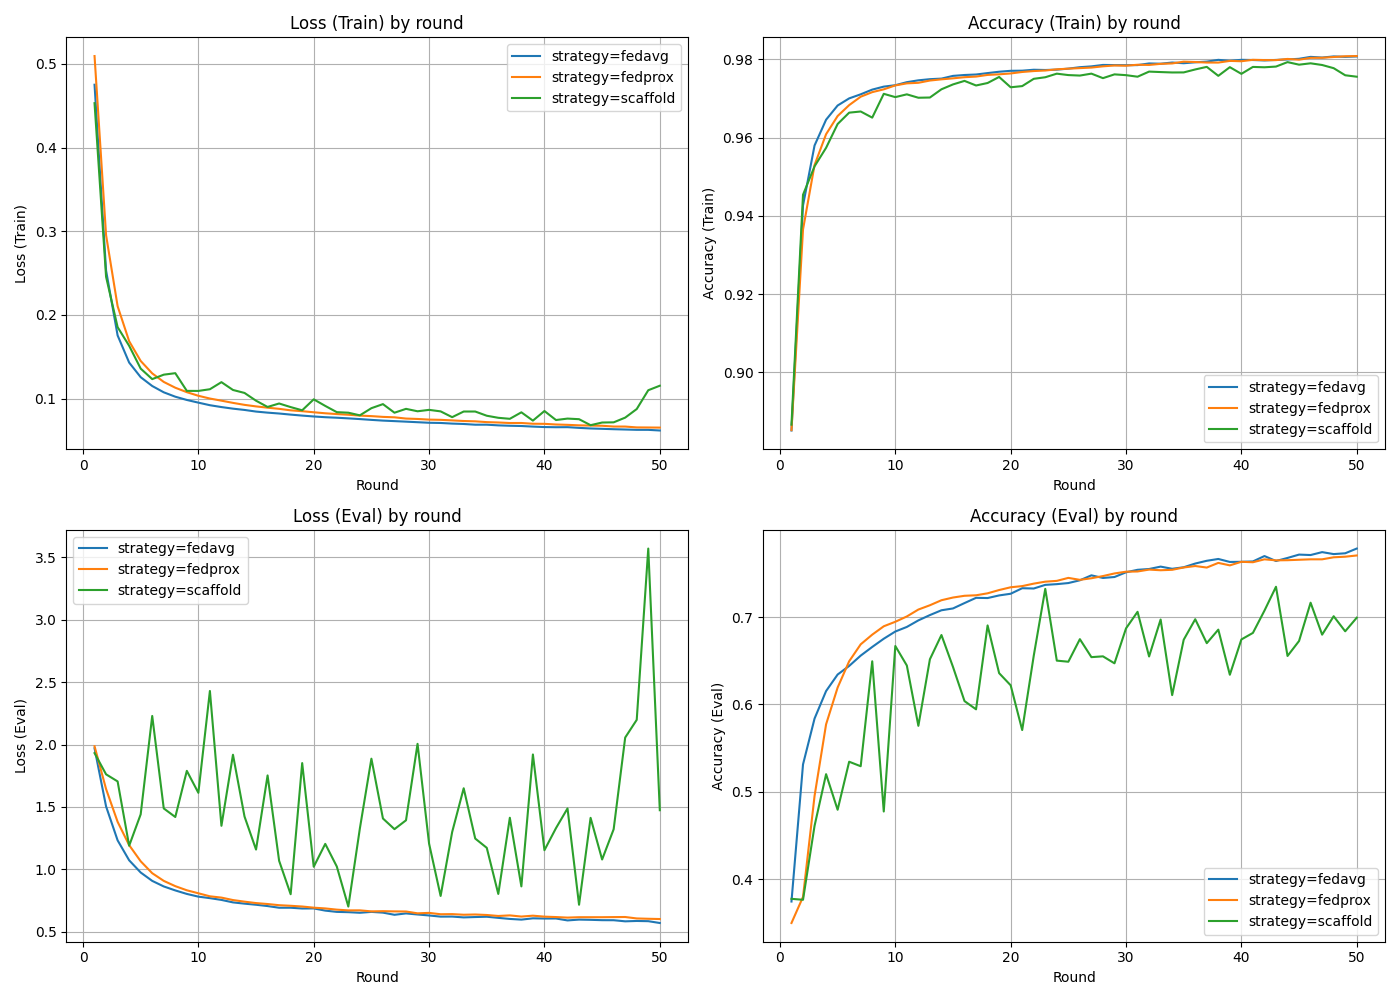

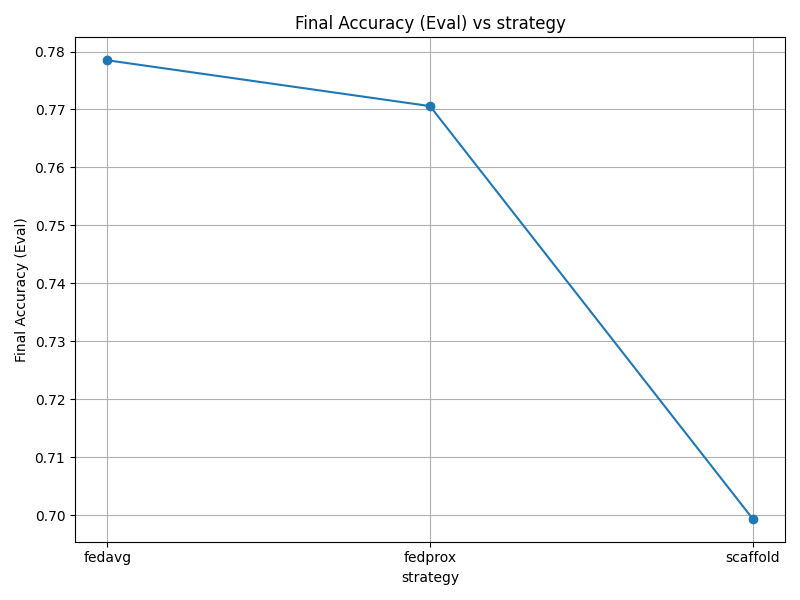

In [17]:
from IPython.display import Image, display

plot1_path = 'results_compare_low/plot1.png'
plot2_path = 'results_compare_low/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# A = 1 compare

In [18]:
import os
import subprocess
import time
import shutil

folder = "results_compare_med"


def run_experiment(strat_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for strat in strat_list:
        log_folder = os.path.join(folder, f"logs_{strat}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {strat} ===")
        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "1",
            "--strategy", strat
        ]
        server_log_path = os.path.join(log_folder, f"server_{strat}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
                "--strategy", strat
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_{strat}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {strat} ===\n")

strat_list = ["fedavg","fedprox","scaffold"]
run_experiment(strat_list)

Deleted existing folder: results_compare_med

=== Running test for fedavg ===
Started server (PID 50271)
Started client 0 (PID 50294)
Started client 1 (PID 50301)
Started client 2 (PID 50302)
Started client 3 (PID 50334)
Started client 4 (PID 50346)
Started client 5 (PID 50358)
Started client 6 (PID 50359)
Started client 7 (PID 50382)
Started client 8 (PID 50383)
Started client 9 (PID 50395)


=== Finished test for fedavg ===


=== Running test for fedprox ===
Started server (PID 52820)
Started client 0 (PID 52843)
Started client 1 (PID 52844)
Started client 2 (PID 52871)
Started client 3 (PID 52883)
Started client 4 (PID 52895)
Started client 5 (PID 52896)
Started client 6 (PID 52908)
Started client 7 (PID 52920)
Started client 8 (PID 52932)
Started client 9 (PID 52944)
=== Finished test for fedprox ===


=== Running test for scaffold ===
Started server (PID 55528)
Started client 0 (PID 55557)
Started client 1 (PID 55558)
Started client 2 (PID 55579)
Started client 3 (PID 55591)
Started client 4 (PID 55603)
Started client 5 (PID 55615)
Started client 6 (PID 55627)
Started client 7 (PID 55628)
Started client 8 (PID 55640)
Started client 9 (PID 55653)
=== Finished test for scaffold ===



In [19]:
! python vizualizer.py --folder results_compare_med --param_index 6 --print_table

+--------+-------+--------+-------+------+-------+----------+--------------------+--------------------+
| rounds | epoch | client | batch |  lr  | alpha | strategy |      accuracy      |        loss        |
+--------+-------+--------+-------+------+-------+----------+--------------------+--------------------+
|   50   |   3   |   10   |   64  | 0.01 |  1.0  |  fedavg  | 0.8711370262390671 | 0.3578197963309258 |
|   50   |   3   |   10   |   64  | 0.01 |  1.0  | fedprox  | 0.865972511453561  | 0.3716159487728872 |
|   50   |   3   |   10   |   64  | 0.01 |  1.0  | scaffold | 0.8708038317367763 | 0.3678874671210949 |
+--------+-------+--------+-------+------+-------+----------+--------------------+--------------------+
Saved metric curve plots to results_compare_med/plot1.png
Saved final accuracy vs param plot to results_compare_med/plot2.png


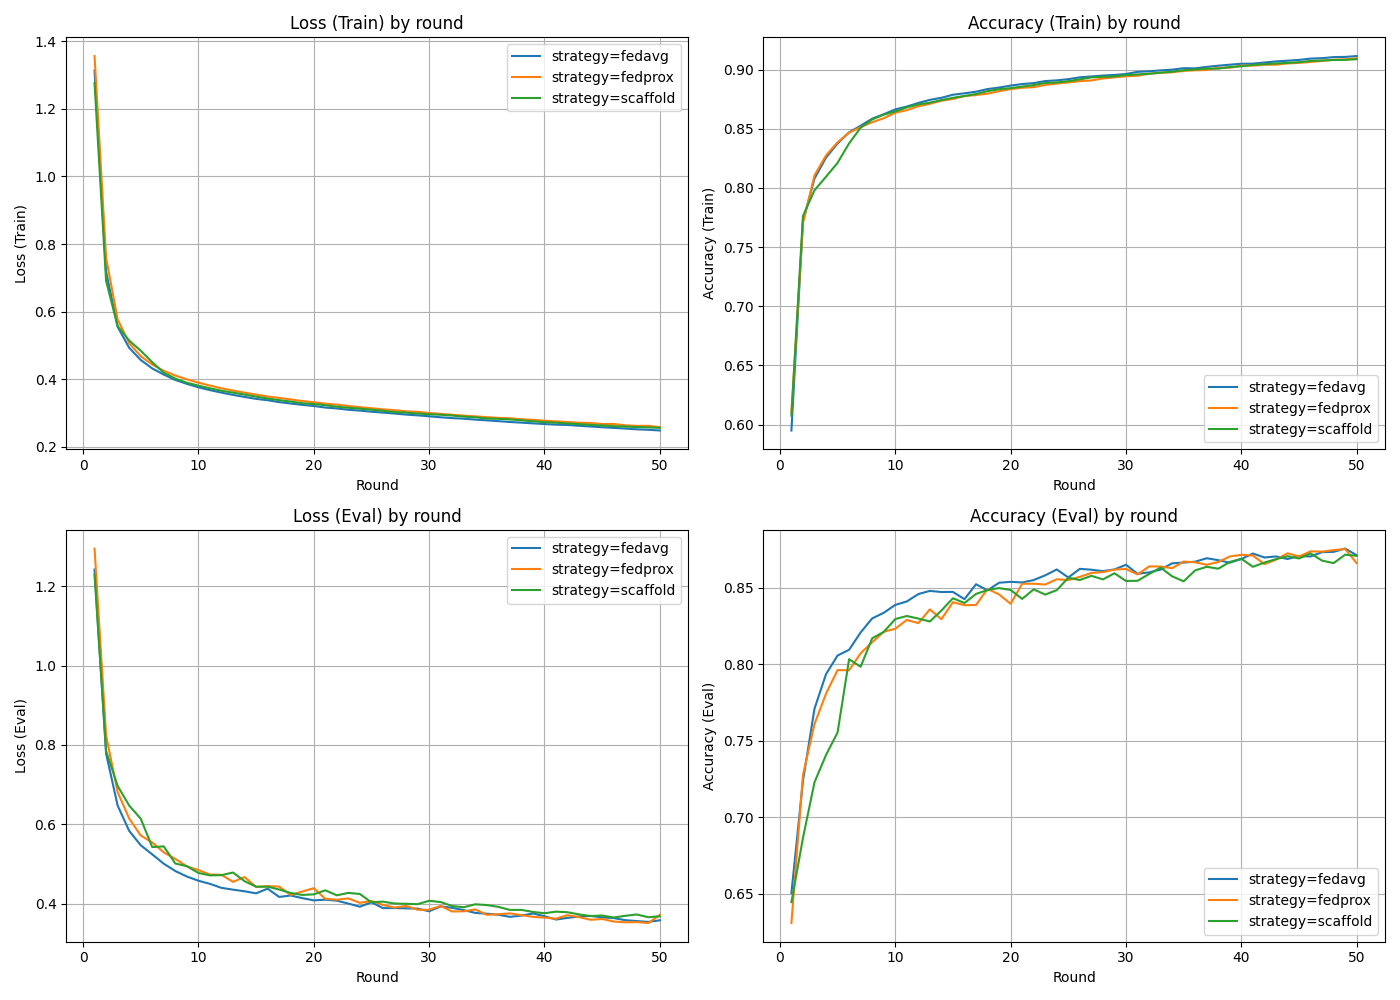

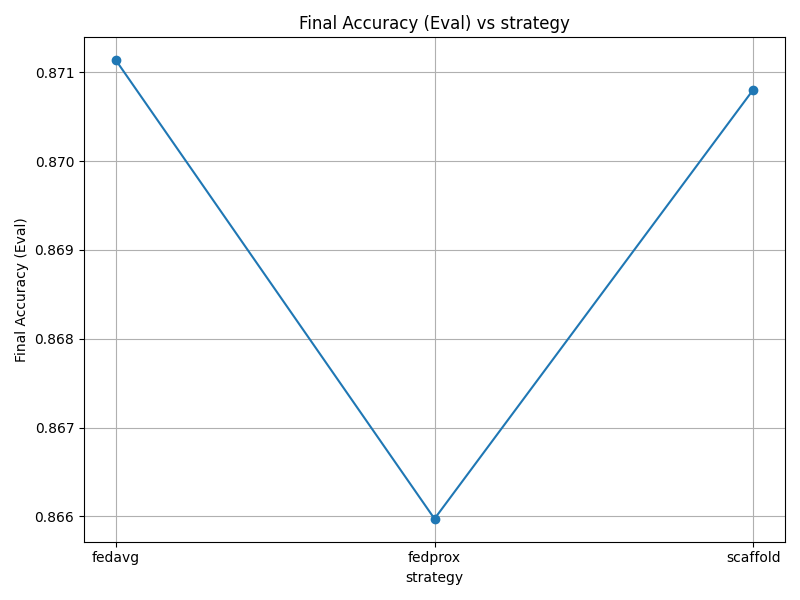

In [20]:
from IPython.display import Image, display

plot1_path = 'results_compare_med/plot1.png'
plot2_path = 'results_compare_med/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# A=10 compare

In [21]:
import os
import subprocess
import time
import shutil

folder = "results_compare_high"


def run_experiment(strat_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for strat in strat_list:
        log_folder = os.path.join(folder, f"logs_{strat}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {strat} ===")
        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "10",
            "--strategy", strat
        ]
        server_log_path = os.path.join(log_folder, f"server_{strat}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
                "--strategy", strat
            ]

            client_log_path = os.path.join(log_folder, f"client_{cid}_{strat}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {strat} ===\n")

strat_list = ["fedavg","fedprox","scaffold"]
run_experiment(strat_list)

Deleted existing folder: results_compare_high

=== Running test for fedavg ===
Started server (PID 57992)
Started client 0 (PID 58035)
Started client 1 (PID 58036)
Started client 2 (PID 58037)
Started client 3 (PID 58055)
Started client 4 (PID 58067)
Started client 5 (PID 58079)
Started client 6 (PID 58091)
Started client 7 (PID 58103)
Started client 8 (PID 58115)
Started client 9 (PID 58116)


=== Finished test for fedavg ===


=== Running test for fedprox ===
Started server (PID 60361)
Started client 0 (PID 60384)
Started client 1 (PID 60405)
Started client 2 (PID 60412)
Started client 3 (PID 60424)
Started client 4 (PID 60436)
Started client 5 (PID 60448)
Started client 6 (PID 60460)
Started client 7 (PID 60472)
Started client 8 (PID 60473)
Started client 9 (PID 60485)
=== Finished test for fedprox ===


=== Running test for scaffold ===
Started server (PID 62955)
Started client 0 (PID 62978)
Started client 1 (PID 63005)
Started client 2 (PID 63006)
Started client 3 (PID 63018)
Started client 4 (PID 63030)
Started client 5 (PID 63042)
Started client 6 (PID 63043)
Started client 7 (PID 63062)
Started client 8 (PID 63078)
Started client 9 (PID 63079)
=== Finished test for scaffold ===



In [22]:
! python vizualizer.py --folder results_compare_high --param_index 6 --print_table

+--------+-------+--------+-------+------+-------+----------+--------------------+---------------------+
| rounds | epoch | client | batch |  lr  | alpha | strategy |      accuracy      |         loss        |
+--------+-------+--------+-------+------+-------+----------+--------------------+---------------------+
|   50   |   3   |   10   |   64  | 0.01 |  10.0 |  fedavg  | 0.8756351520199916 | 0.34742065983382625 |
|   50   |   3   |   10   |   64  | 0.01 |  10.0 | fedprox  | 0.8775510204081632 | 0.34972746529612925 |
|   50   |   3   |   10   |   64  | 0.01 |  10.0 | scaffold | 0.872969596001666  |  0.3544056376309655 |
+--------+-------+--------+-------+------+-------+----------+--------------------+---------------------+
Saved metric curve plots to results_compare_high/plot1.png
Saved final accuracy vs param plot to results_compare_high/plot2.png


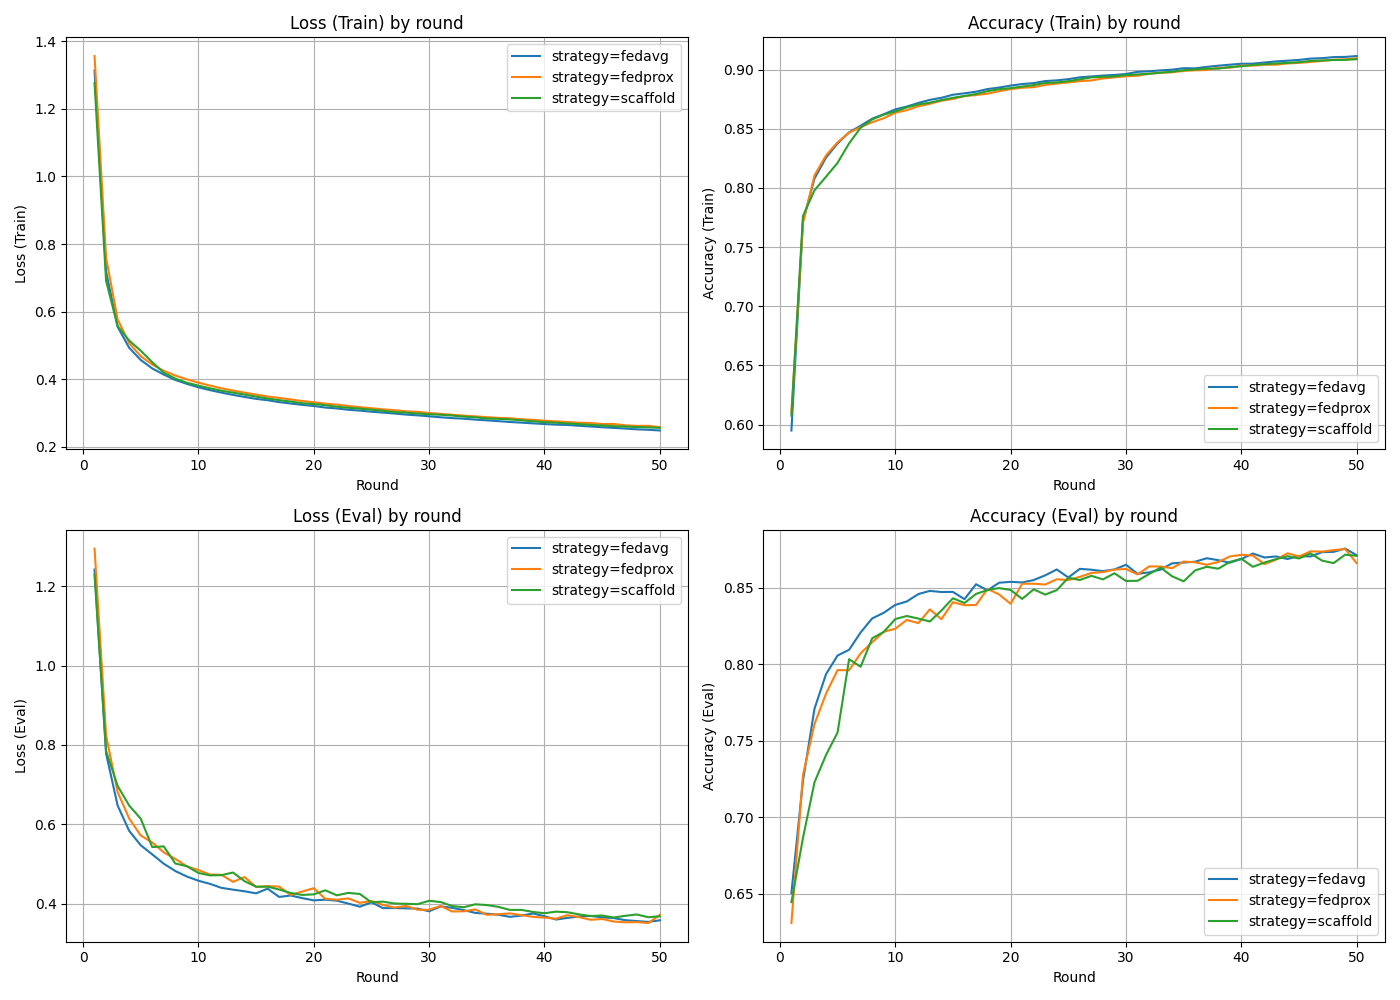

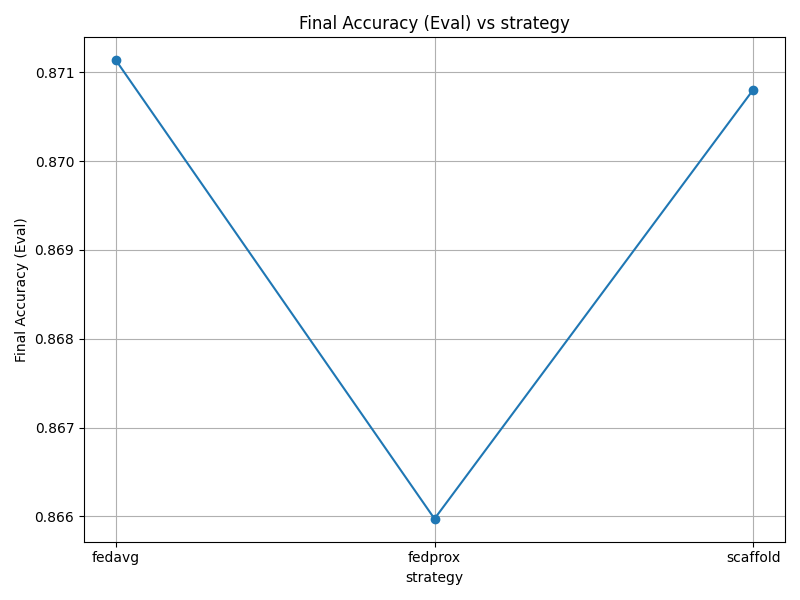

In [23]:
from IPython.display import Image, display

plot1_path = 'results_compare_med/plot1.png'
plot2_path = 'results_compare_med/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))